In [1]:
!pip install tensorflow

  Using cached wrapt-1.16.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 49.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 88.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 67.5 MB/s eta 0:00:00
Using cached wrapt-1.16.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86

# TensorFlow

![Tensors](https://miro.medium.com/v2/resize:fit:1400/0*jGB1CGQ9HdeUwlgB)

TensorFlow is an `open-source` library for numerical computation on tensors that uses directed graphs to represent the computation that you want to do.


Tensorflow graphs are portable between different devices.

### TensorFlow API hierarchy

![TF API abstraction layers](./img/lab_9_tf_api.png)

* The lowest layer of abstraction is the layer that's implemented to target the different hardware platforms.
* The next level is the TensorFlow C++ API where you can write custom TensorFlow operations.
* The core Python API is what contains much of the numeric processing code to work with tensors
* Sets of Python modules that have high-level representation of useful neural network components. These modules are useful when building custom neural network models.
* Lastly, the high-level APIs allow you to easily do distributed training, data preprocessing, the model definition, compilation and overall training.

## TF tensors and variable

In [ ]:
import tensorflow as tf

In [ ]:
# scalar
x = tf.constant(3)
print(x)
print(x.shape)

In [ ]:
# vector
x = tf.constant([3, 5, 7])
print(x.shape)

In [ ]:
# Matrix
x = tf.constant([[3, 5, 7],
                 [4, 6, 8]])
print(x.shape)

In [ ]:
# 3D Tensor
x3 = tf.stack([x, x])
print(x3.shape)

In [ ]:
x3

note: Tensors can be reshaped. 

`tf.constant` produces constant tensors while `tf.Variable` can be modified.

In [ ]:
x = tf.Variable(3.0, dtype=tf.float32, name='sample_variable')
x

In [ ]:
x.assign(6)
x

In [ ]:
x.assign_add(1)

Let's look at a simplified neural network architecture again

![NN](./img/lab_9_nn_recap.png)

In [ ]:
# input data
x = tf.constant([[3, 4]])
# weights that will change
w = tf.Variable([[1], [2]])

# compute the dot product of weights and input feature
tf.matmul(w, x)

### TF Input Data Pipeline

`tf.data.Dataset` allows you to feed, preprocess, and configure data to TF models.

* create data pipelines from
    * in-memory dict or lists of tensors ```tf.data.Dataset.from_tensor_slices((X, Y))```
    * out-of-memory sharded data files ```tf.data.TFRecrodDataset(files)```
* preprocess data in parallel and cache result of costly operation ```dataset.map(expensive_function).cache()```
* configure data ```dataset.shuffle(1000).repeat(epochs).batch()```

# Regression with TF

## Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

/Users/amirimani/Documents/projects/Machine_Learning_Pratt/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [12]:
tf.random.set_seed(42)

In [13]:
# Abalone dataset https://archive.ics.uci.edu/ml/datasets/abalone
cols = ["Length", "Diameter", "Height",
         "Whole weight", "Shucked weight",
         "Viscera weight", "Shell weight", "Age"]

df_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv", header=None, 
    names=cols)


df_test = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_test.csv", header=None, 
    names=cols)

df_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3320 non-null   float64
 1   Diameter        3320 non-null   float64
 2   Height          3320 non-null   float64
 3   Whole weight    3320 non-null   float64
 4   Shucked weight  3320 non-null   float64
 5   Viscera weight  3320 non-null   float64
 6   Shell weight    3320 non-null   float64
 7   Age             3320 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 207.6 KB


The nominal task for this dataset is to predict the age from the other measurements, so separate the features and labels for training:

In [15]:
X_train = df_train.copy()
y_train = X_train.pop('Age')


X_test = df_test.copy()
y_test = X_test.pop('Age')

## Modeling

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. 

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [16]:
# Basic with no preprocessing
abalone_model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='relu')
])

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps.

In [17]:
abalone_model.compile(loss=tf.losses.MeanSquaredError(),
                    optimizer=tf.optimizers.Adam()
                    )

In [18]:
X_train.shape

(3320, 7)

In [19]:
abalone_model.build(input_shape=X_train.shape)
abalone_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (3320, 64)                512       
                                                                 
 dense_3 (Dense)             (3320, 1)                 65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history = abalone_model.fit(X_train, y_train,
                             epochs=10,
                             batch_size=16,
                             validation_data=(X_test, y_test)
                             )

Epoch 1/10


208/208 [==============================] - 0s 978us/step - loss: 50.0834 - val_loss: 9.9414
Epoch 2/10
208/208 [==============================] - 0s 720us/step - loss: 8.5213 - val_loss: 8.4255
Epoch 3/10
208/208 [==============================] - 0s 860us/step - loss: 7.6453 - val_loss: 7.7118
Epoch 4/10
208/208 [==============================] - 0s 689us/step - loss: 7.0037 - val_loss: 7.2820
Epoch 5/10
208/208 [==============================] - 0s 697us/step - loss: 6.6283 - val_loss: 6.9843
Epoch 6/10
208/208 [==============================] - 0s 683us/step - loss: 6.3747 - val_loss: 6.7854
Epoch 7/10
208/208 [==============================] - 0s 798us/step - loss: 6.1545 - val_loss: 6.5806
Epoch 8/10
208/208 [==============================] - 0s 689us/step - loss: 5.9504 - val_loss: 6.4000
Epoch 9/10
208/208 [==============================] - 0s 664us/step - loss: 5.7558 - val_loss: 6.2630
Epoch 10/10
208/208 [==============================] - 0s 644us/step - loss: 5.5897 - val_lo

In [21]:
df_history = pd.DataFrame(history.history)

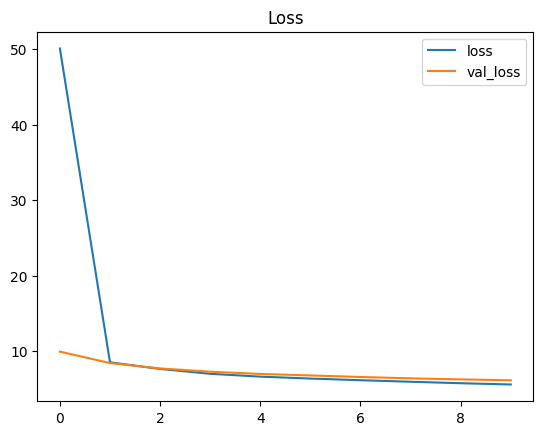

In [22]:
#  visualize the training loss with each epoch.
df_history['loss'].plot() 
df_history['val_loss'].plot() 
plt.title('Loss') 
plt.legend() 
plt.show() 

## Preprocessing

It's good practice to normalize the inputs to your model. The `experimental.preprocessing` layers provide a convenient way to build this normalization into your model.

In [23]:
normalize = preprocessing.Normalization()

**Note: Only use your training data to .adapt() preprocessing layers. Do not use your validation or test data.**

In [24]:
normalize.adapt(X_train)

In [26]:
# use the normalization layer in the model
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='relu')
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

history_norm = norm_abalone_model.fit(X_train, y_train,
                      epochs=10,
                      batch_size=64,
                      validation_data=(X_test, y_test)
)

Epoch 1/10
52/52 [==============================] - 0s 2ms/step - loss: 83.7400 - val_loss: 71.0805
Epoch 2/10
52/52 [==============================] - 0s 1ms/step - loss: 54.8927 - val_loss: 46.9656
Epoch 3/10
52/52 [==============================] - 0s 912us/step - loss: 38.4549 - val_loss: 35.9777
Epoch 4/10
52/52 [==============================] - 0s 913us/step - loss: 31.6421 - val_loss: 30.4747
Epoch 5/10
52/52 [==============================] - 0s 953us/step - loss: 26.5866 - val_loss: 24.8179
Epoch 6/10
52/52 [==============================] - 0s 869us/step - loss: 20.8409 - val_loss: 18.6457
Epoch 7/10
52/52 [==============================] - 0s 885us/step - loss: 15.2835 - val_loss: 13.4073
Epoch 8/10
52/52 [==============================] - 0s 834us/step - loss: 11.3189 - val_loss: 10.2362
Epoch 9/10
52/52 [==============================] - 0s 890us/step - loss: 9.0573 - val_loss: 8.5685
Epoch 10/10
52/52 [==============================] - 0s 913us/step - loss: 7.8944 - val_

We use a loss function to determine how far the predicted values deviate from the actual values in the training data. ... We change the model weights to make the loss minimum, and that is what training is all about

In [27]:
norm_abalone_model.evaluate(X_train, y_train)

104/104 [==============================] - 0s 508us/step - loss: 7.4794


7.479398250579834

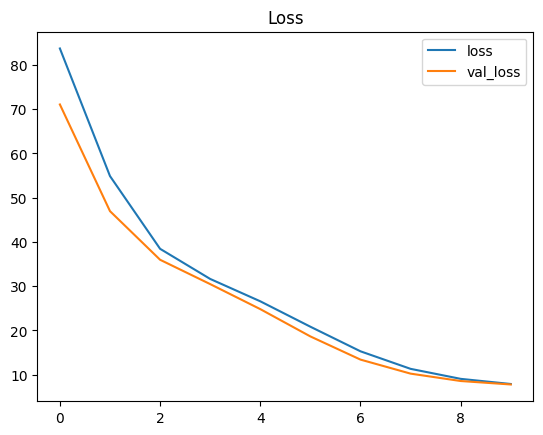

In [28]:
df_history_norm = pd.DataFrame(history_norm.history)

df_history_norm['loss'].plot() 
df_history_norm['val_loss'].plot() 
plt.title('Loss') 
plt.legend() 
plt.show()

## Classification Example

In [29]:
mnist = tf.keras.datasets.mnist

In [30]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [33]:
x_train[0].shape

(28, 28)

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

In [44]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_history = model.fit(x_train, 
                             y_train, 
                             epochs=25,
                             validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3599 - accuracy: 0.8909 - val_loss: 0.1463 - val_accuracy: 0.9556
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1708 - accuracy: 0.9490 - val_loss: 0.1164 - val_accuracy: 0.9660
Epoch 3/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1330 - accuracy: 0.9600 - val_loss: 0.1009 - val_accuracy: 0.9703
Epoch 4/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1145 - accuracy: 0.9649 - val_loss: 0.0956 - val_accuracy: 0.9710
Epoch 5/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0984 - accuracy: 0.9702 - val_loss: 0.0865 - val_accuracy: 0.9730
Epoch 6/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.0858 - val_accuracy: 0.9755
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0795 - accuracy: 0.9751 - val_loss: 0.0829 - val_accuracy:

In [45]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 10

In [46]:
# Evaluate returns the loss value and metrics values for the model.
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 625us/step - loss: 0.1047 - accuracy: 0.9766


[0.10466381907463074, 0.9765999913215637]

You can learn a lot about neural networks and deep learning models by observing their performance over time during training.

In [47]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

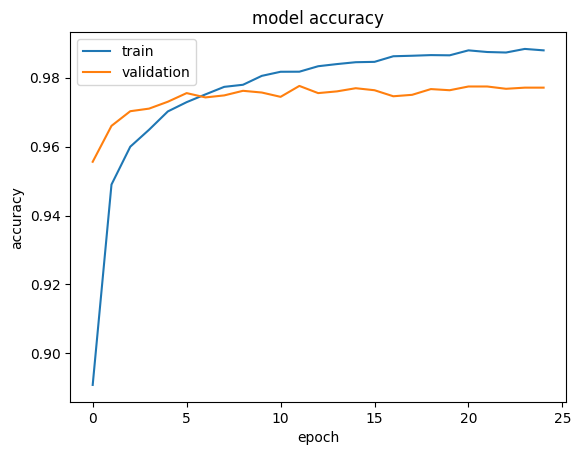

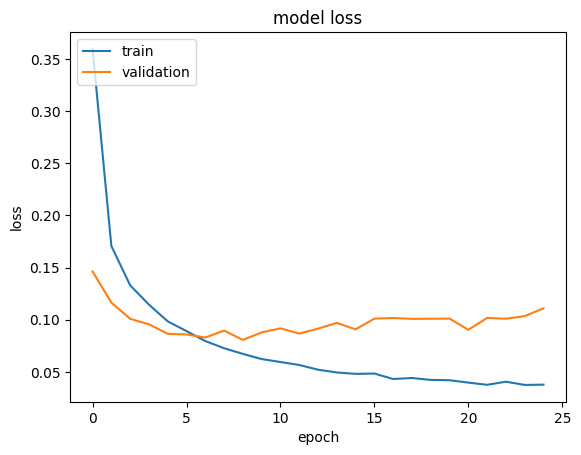

In [48]:
# summarize history for accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [49]:
# Savemodel is the universal serialization format for TF models
tf.saved_model.save(model, './exports/models/')

INFO:tensorflow:Assets written to: ./exports/models/assets


INFO:tensorflow:Assets written to: ./exports/models/assets
